In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, OPTICS
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, silhouette_samples
from scipy.spatial.distance import pdist, squareform
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import SilhouetteVisualizer
import umap
from sklearn.neighbors import NearestNeighbors
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
import joblib


In [10]:
df = pd.read_csv('CC GENERAL.csv')

In [11]:
print(df.columns)

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [13]:
df.shape

(8950, 18)

In [14]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [15]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [16]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [17]:
df.isna().sum().sum()

314

In [18]:
df.dropna(inplace=True)

In [19]:
df.isna().sum().sum()

0

In [20]:
df = df.drop(columns=['CUST_ID'])

([0, 1, 2, 3, 4],
 [Text(0, 0, 'BALANCE'),
  Text(1, 0, 'BALANCE_FREQUENCY'),
  Text(2, 0, 'PURCHASES'),
  Text(3, 0, 'ONEOFF_PURCHASES'),
  Text(4, 0, 'INSTALLMENTS_PURCHASES')])

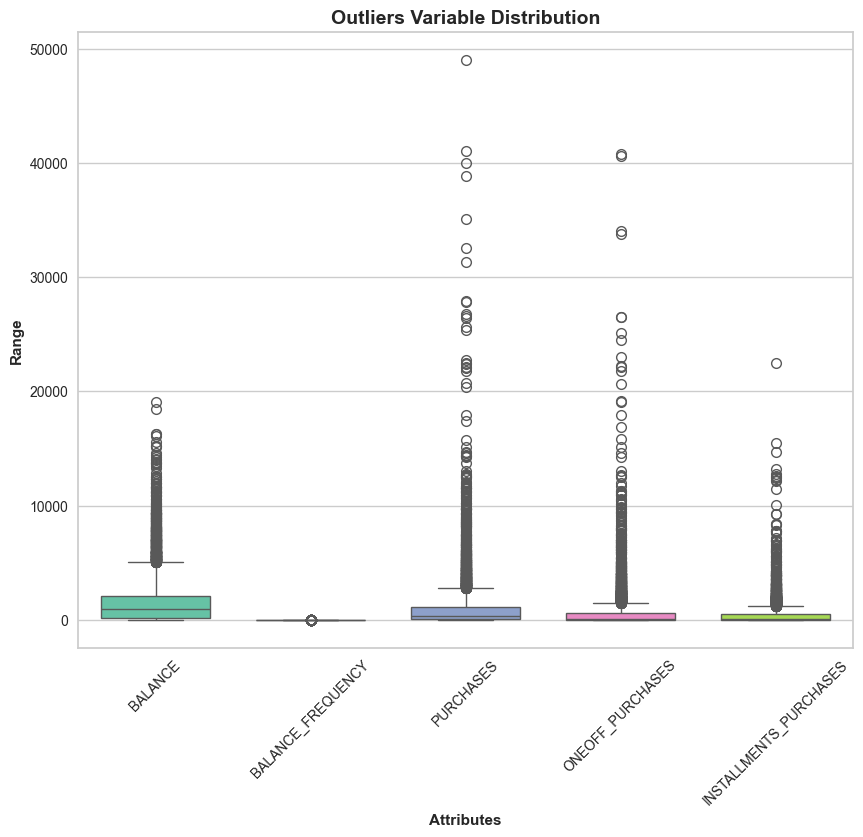

In [21]:
import math
num_attributes = [x for x in df.columns if df[x].dtype in ('float64','int64')]
num_attributes_1 = num_attributes[:math.floor((len(num_attributes))/3)]
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df[num_attributes_1], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
plt.xticks(rotation=45)


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'CASH_ADVANCE'),
  Text(1, 0, 'PURCHASES_FREQUENCY'),
  Text(2, 0, 'ONEOFF_PURCHASES_FREQUENCY'),
  Text(3, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY'),
  Text(4, 0, 'CASH_ADVANCE_FREQUENCY'),
  Text(5, 0, 'CASH_ADVANCE_TRX'),
  Text(6, 0, 'PURCHASES_TRX')])

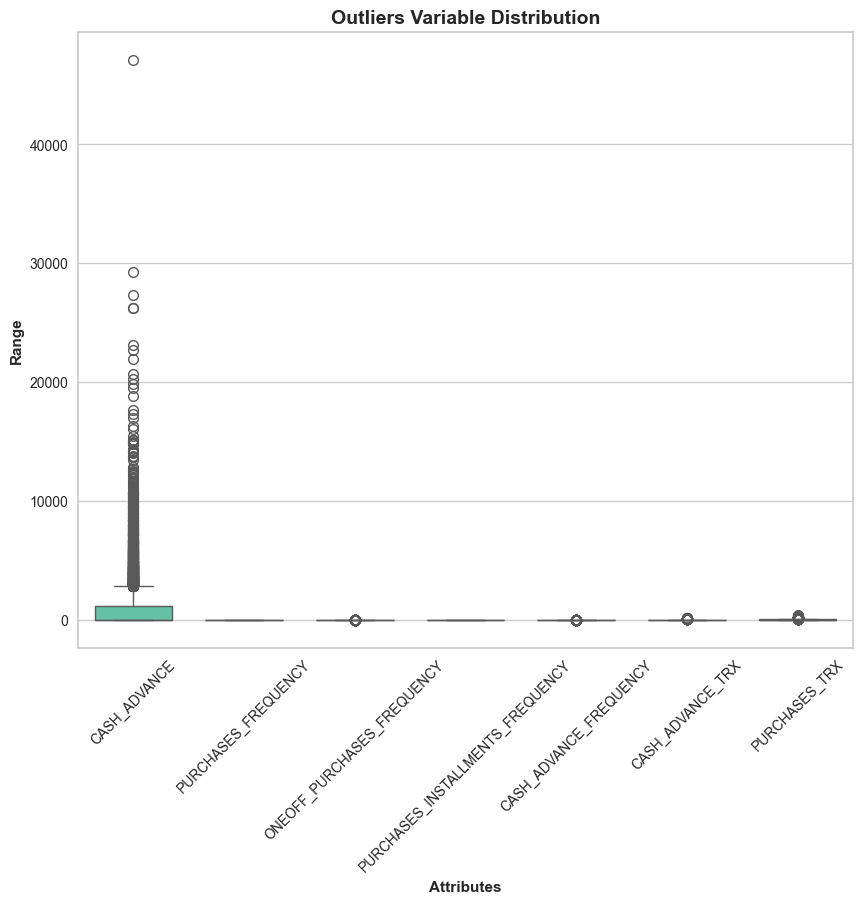

In [22]:
num_attributes_2 = num_attributes[math.floor((len(num_attributes))/3):len(num_attributes)-5]
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df[num_attributes_2], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
plt.xticks(rotation=45)


([0, 1, 2, 3, 4],
 [Text(0, 0, 'CREDIT_LIMIT'),
  Text(1, 0, 'PAYMENTS'),
  Text(2, 0, 'MINIMUM_PAYMENTS'),
  Text(3, 0, 'PRC_FULL_PAYMENT'),
  Text(4, 0, 'TENURE')])

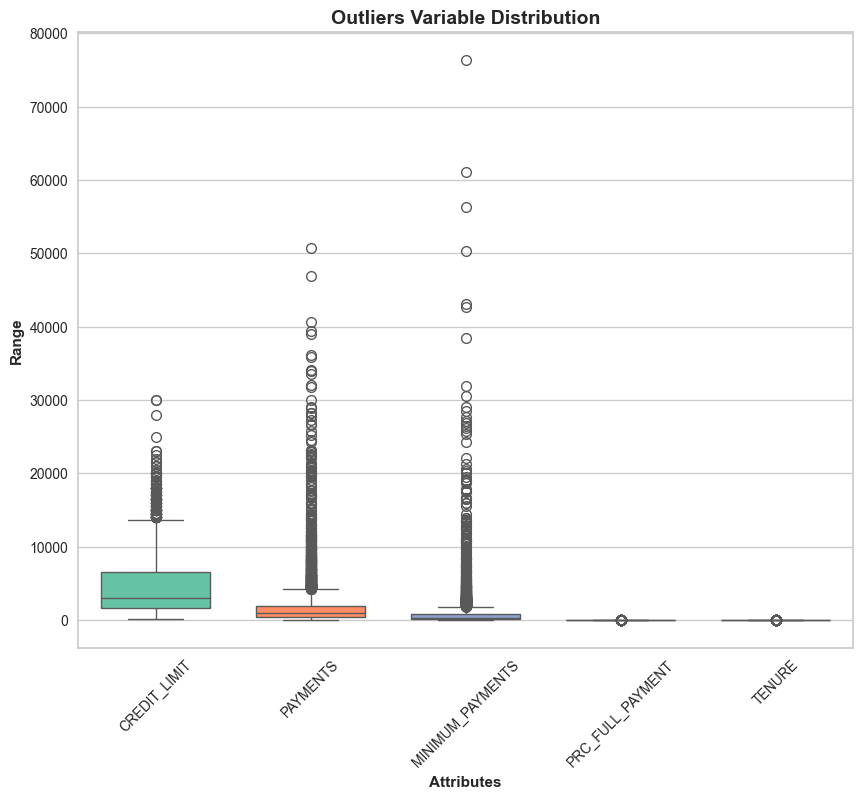

In [23]:
num_attributes_3 = num_attributes[len(num_attributes)-5:]
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df[num_attributes_3], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
plt.xticks(rotation=45)


In [24]:
outlier_percentage = {}
for feature in df:
    tempData = df.sort_values(by=feature)[feature]
    Q1, Q3 = tempData.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)
    
    outlier_count = ((tempData < Lower_range) | (tempData > Upper_range)).sum()
    outlier_perc = round((outlier_count / tempData.shape[0]) * 100, 2)
    outlier_percentage[feature] = outlier_perc

outlier_percentage


{'BALANCE': 7.71,
 'BALANCE_FREQUENCY': 17.5,
 'PURCHASES': 8.89,
 'ONEOFF_PURCHASES': 11.13,
 'INSTALLMENTS_PURCHASES': 9.39,
 'CASH_ADVANCE': 11.31,
 'PURCHASES_FREQUENCY': 0.0,
 'ONEOFF_PURCHASES_FREQUENCY': 8.67,
 'PURCHASES_INSTALLMENTS_FREQUENCY': 0.0,
 'CASH_ADVANCE_FREQUENCY': 3.95,
 'CASH_ADVANCE_TRX': 9.19,
 'PURCHASES_TRX': 8.29,
 'CREDIT_LIMIT': 2.81,
 'PAYMENTS': 9.09,
 'MINIMUM_PAYMENTS': 9.74,
 'PRC_FULL_PAYMENT': 15.55,
 'TENURE': 14.94}

In [25]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [26]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from random import sample

def hopkins(X):
    d = X.shape[1]
    n = len(X) 
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)

    
    rand_X = sample(range(0, n, 1), m)
    
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(np.random.uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X[rand_X[j]].reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
        
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if np.isnan(H):
        print(ujd, wjd)
        H = 0

    return H


In [27]:
hopkins_score = hopkins(df_scaled)
print(hopkins_score)


0.9647539642277483


In [28]:
def preprocess_data(data):
    feature_boundaries = {
        'BALANCE': [0, 500, 1000, 3000, 5000, 10000],
        'PURCHASES': [0, 500, 1000, 3000, 5000, 10000],
        'ONEOFF_PURCHASES': [0, 500, 1000, 3000, 5000, 10000],
        'INSTALLMENTS_PURCHASES': [0, 500, 1000, 3000, 5000, 10000],
        'CASH_ADVANCE': [0, 500, 1000, 3000, 5000, 10000],
        'CREDIT_LIMIT': [0, 500, 1000, 3000, 5000, 10000],
        'PAYMENTS': [0, 500, 1000, 3000, 5000, 10000],
        'MINIMUM_PAYMENTS': [0, 500, 1000, 3000, 5000, 10000]
    }

    frequency_boundaries = {
        'BALANCE_FREQUENCY': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'PURCHASES_FREQUENCY': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'ONEOFF_PURCHASES_FREQUENCY': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'PURCHASES_INSTALLMENTS_FREQUENCY': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'CASH_ADVANCE_FREQUENCY': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'PRC_FULL_PAYMENT': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    }

    trx_boundaries = {
        'PURCHASES_TRX': [0, 5, 10, 15, 20, 30, 50, 100],
        'CASH_ADVANCE_TRX': [0, 5, 10, 15, 20, 30, 50, 100]
    }

    def assign_range(column, boundaries):
        new_column = column + '_RANGE'
        data[new_column] = 0
        for idx, boundary in enumerate(boundaries):
            if idx == len(boundaries) - 1:
                data.loc[data[column] > boundary, new_column] = idx + 1
            else:
                data.loc[(data[column] > boundary) & (data[column] <= boundaries[idx + 1]), new_column] = idx + 1

    for column, boundaries in feature_boundaries.items():
        assign_range(column, boundaries)

    for column, boundaries in frequency_boundaries.items():
        assign_range(column, boundaries)

    for column, boundaries in trx_boundaries.items():
        assign_range(column, boundaries)

    columns_to_drop = [
        'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
        'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
        'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
        'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
        'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'
    ]
    df_wo = df.drop(columns=columns_to_drop)

    return df_wo


In [29]:
df_wo = preprocess_data(df)

In [30]:
df_wo.head()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0
5,12,3,3,0,3,0,3,3,3,10,7,0,6,0,0,2,0


In [31]:
results = {
    "KMeans": {
        "normal": {},
        "umap": {},
        "pca": {},
        "outlier_free": {}
    },
    "DBSCAN": {
        "normal": {},
        "umap": {},
        "pca": {}
    },
    "OPTICS": {
        "normal": {},
        "umap": {},
        "pca": {}
    }
}


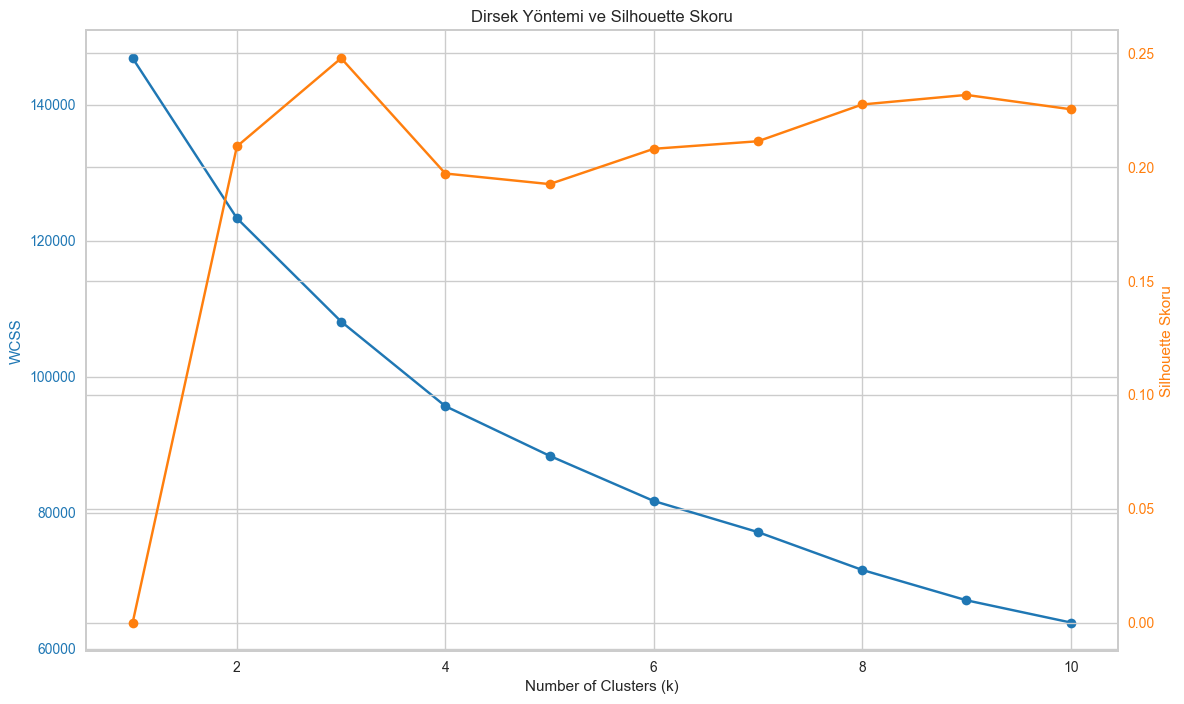

In [32]:
k_values = range(1, 11)  
wcss = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    if k > 1:  
        silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))
    else:
        silhouette_scores.append(0)  

fig, ax1 = plt.subplots(figsize=(12, 7))


ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('WCSS', color='tab:blue')
ax1.plot(k_values, wcss, 'o-', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx() 
ax2.set_ylabel('Silhouette Skoru', color='tab:orange')
ax2.plot(k_values, silhouette_scores, 'o-', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.tight_layout()
plt.title('Dirsek Yöntemi ve Silhouette Skoru')
plt.show()


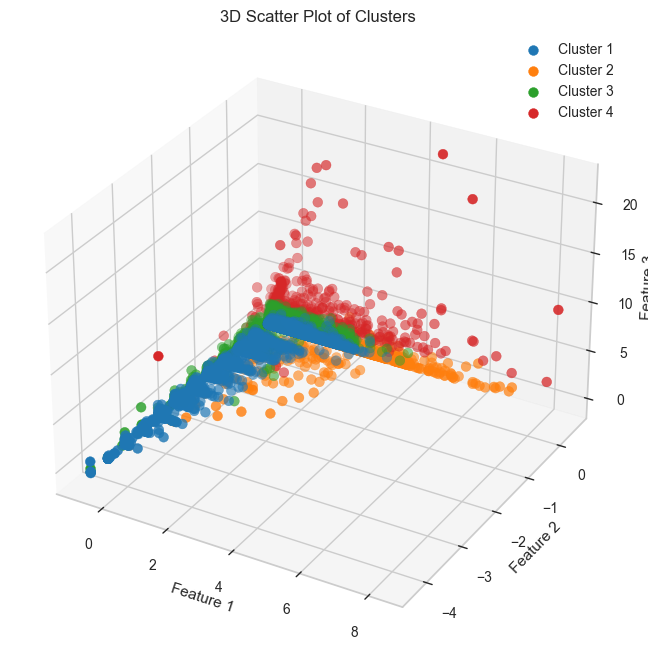

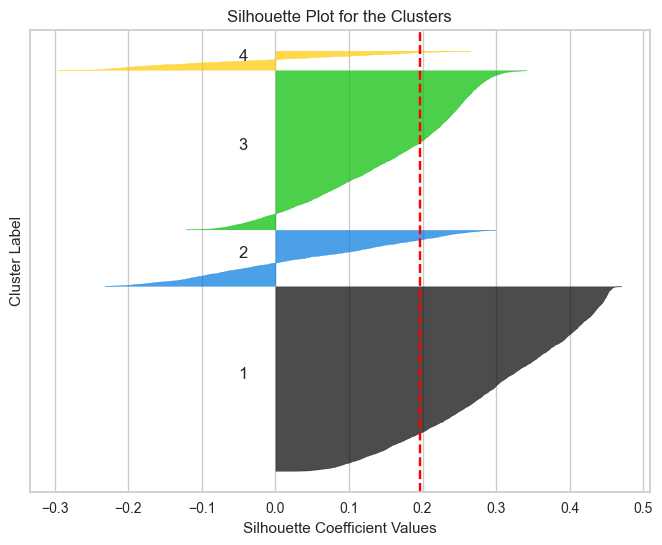

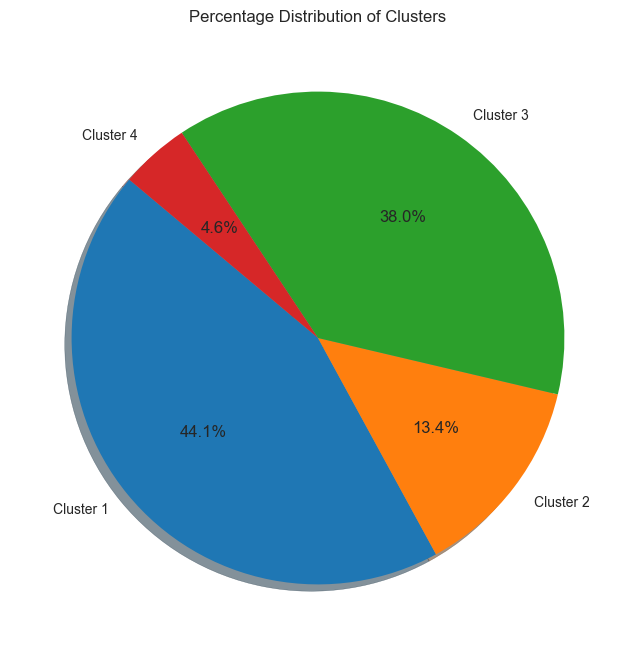

In [33]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df_scaled)
labels = kmeans.labels_

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, color in enumerate(colors):
    ax.scatter(df_scaled[labels == i, 0], df_scaled[labels == i, 1], df_scaled[labels == i, 2], 
               c=color, label=f'Cluster {i+1}', s=50)

ax.set_title("3D Scatter Plot of Clusters")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.legend()
plt.show()

silhouette_vals = silhouette_samples(df_scaled, labels)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
y_lower = 10

for i in range(4):
    ith_cluster_silhouette_values = silhouette_vals[labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 4)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    
    
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
    
    y_lower = y_upper + 10  

ax.set_title("Silhouette Plot for the Clusters")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")
ax.set_yticks([])  
ax.axvline(x=silhouette_score(df_scaled, labels), color="red", linestyle="--")  
plt.show()

cluster_counts = np.bincount(labels)
total_count = len(labels)
percentages = (cluster_counts / total_count) * 100

plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=[f'Cluster {i+1}' for i in range(4)], colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title("Percentage Distribution of Clusters")
plt.show()


In [34]:
kmeans = KMeans(n_clusters=4)  
labels = kmeans.fit_predict(df_scaled)  


results["KMeans"]["normal"]["Silhouette Coefficient"] = silhouette_score(df_scaled, labels)
results["KMeans"]["normal"]["Calinski-Harabasz Index"] = calinski_harabasz_score(df_scaled, labels)
results["KMeans"]["normal"]["Davies-Bouldin Index"] = davies_bouldin_score(df_scaled, labels)

for metric, value in results["KMeans"]["normal"].items():
    print(f"{metric}: {value:.2f}")


Silhouette Coefficient: 0.20
Calinski-Harabasz Index: 1539.21
Davies-Bouldin Index: 1.58


In [35]:
df_wo = preprocess_data(df)


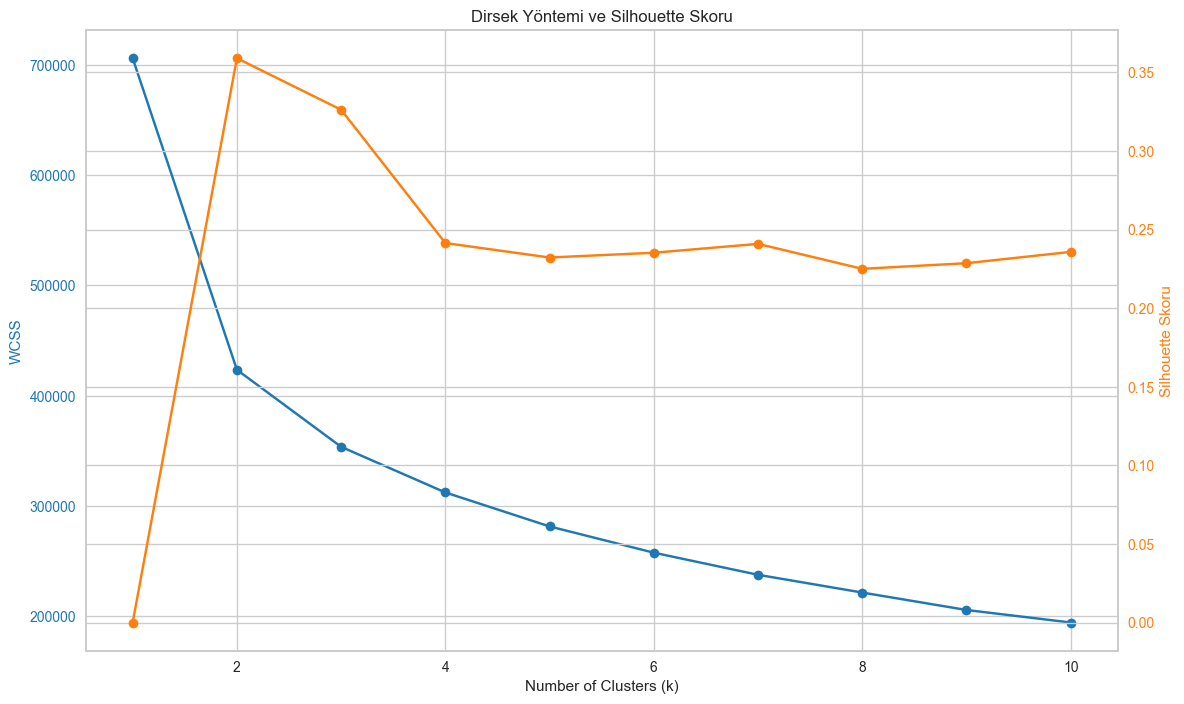

In [36]:
k_values = range(1, 11)  
wcss = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_wo)
    wcss.append(kmeans.inertia_)
    if k > 1:  
        silhouette_scores.append(silhouette_score(df_wo, kmeans.labels_))
    else:
        silhouette_scores.append(0)  

fig, ax1 = plt.subplots(figsize=(12, 7))


ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('WCSS', color='tab:blue')
ax1.plot(k_values, wcss, 'o-', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('Silhouette Skoru', color='tab:orange')
ax2.plot(k_values, silhouette_scores, 'o-', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.tight_layout()
plt.title('Dirsek Yöntemi ve Silhouette Skoru')
plt.show()


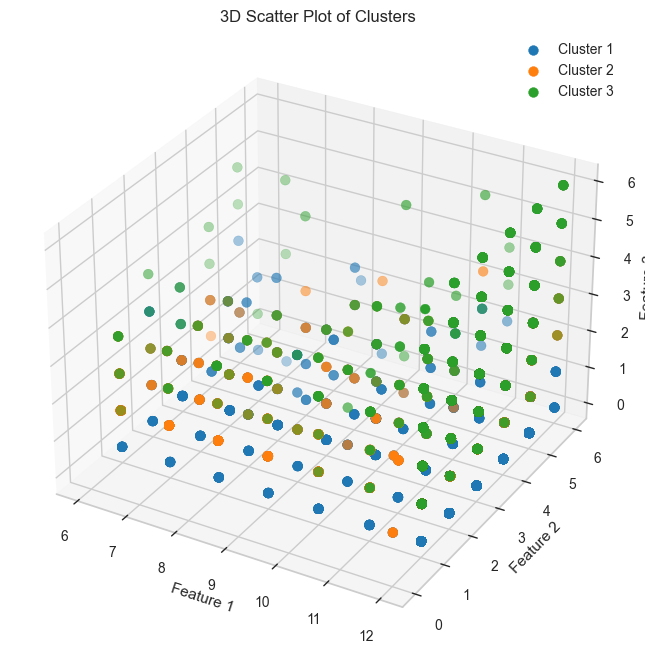

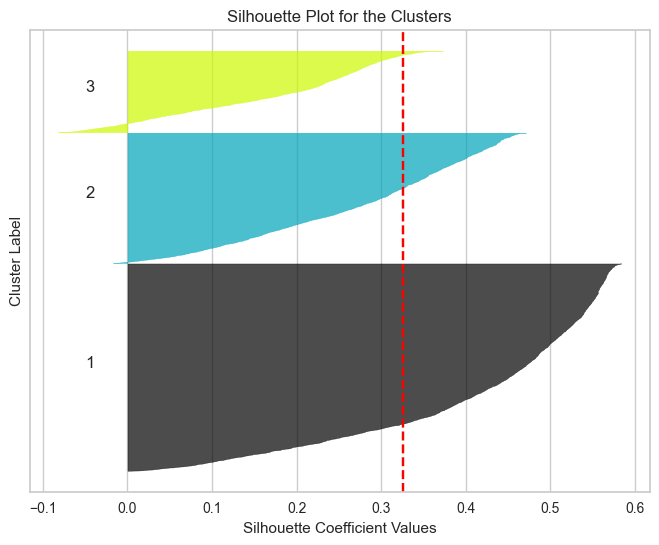

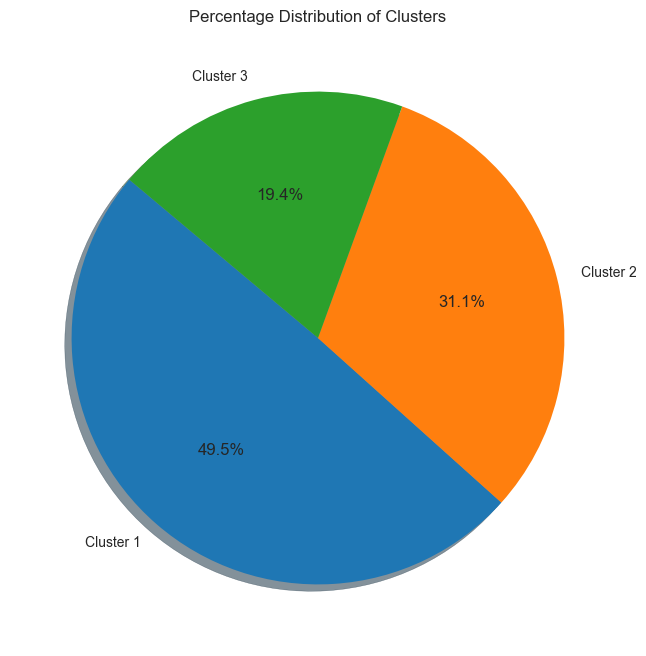

In [37]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df_wo)
labels = kmeans.labels_

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, color in enumerate(colors):
    ax.scatter(df_wo[labels == i].iloc[:, 0], df_wo[labels == i].iloc[:, 1], df_wo[labels == i].iloc[:, 2], 
               c=color, label=f'Cluster {i+1}', s=50)

ax.set_title("3D Scatter Plot of Clusters")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.legend()
plt.show()

silhouette_vals = silhouette_samples(df_wo, labels)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
y_lower = 10
for i in range(3):
    ith_cluster_silhouette_values = silhouette_vals[labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 3)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
    
    y_lower = y_upper + 10  

ax.set_title("Silhouette Plot for the Clusters")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")
ax.set_yticks([])  
ax.axvline(x=silhouette_score(df_wo, labels), color="red", linestyle="--")  
plt.show()

cluster_counts = np.bincount(labels)
total_count = len(labels)
percentages = (cluster_counts / total_count) * 100

plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=[f'Cluster {i+1}' for i in range(3)], colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title("Percentage Distribution of Clusters")
plt.show()


In [38]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = kmeans.fit_predict(df_wo)  

results["KMeans"]["outlier_free"]["Silhouette Coefficient"] = silhouette_score(df_wo, labels)
results["KMeans"]["outlier_free"]["Calinski-Harabasz Index"] = calinski_harabasz_score(df_wo, labels)
results["KMeans"]["outlier_free"]["Davies-Bouldin Index"] = davies_bouldin_score(df_wo, labels)

for metric, value in results["KMeans"]["outlier_free"].items():
    print(f"{metric}: {value:.2f}")


Silhouette Coefficient: 0.33
Calinski-Harabasz Index: 4302.10
Davies-Bouldin Index: 1.41


In [39]:
import umap.umap_ as umap
reducer = umap.UMAP()


embedding = reducer.fit_transform(df_scaled)

df_umap = pd.DataFrame(embedding, columns=['UMAP 1', 'UMAP 2'])

plt.figure(figsize=(12, 8))
plt.scatter(df_umap['UMAP 1'], df_umap['UMAP 2'], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP Projection', fontsize=24);
plt.show()


ModuleNotFoundError: No module named 'umap.umap_'

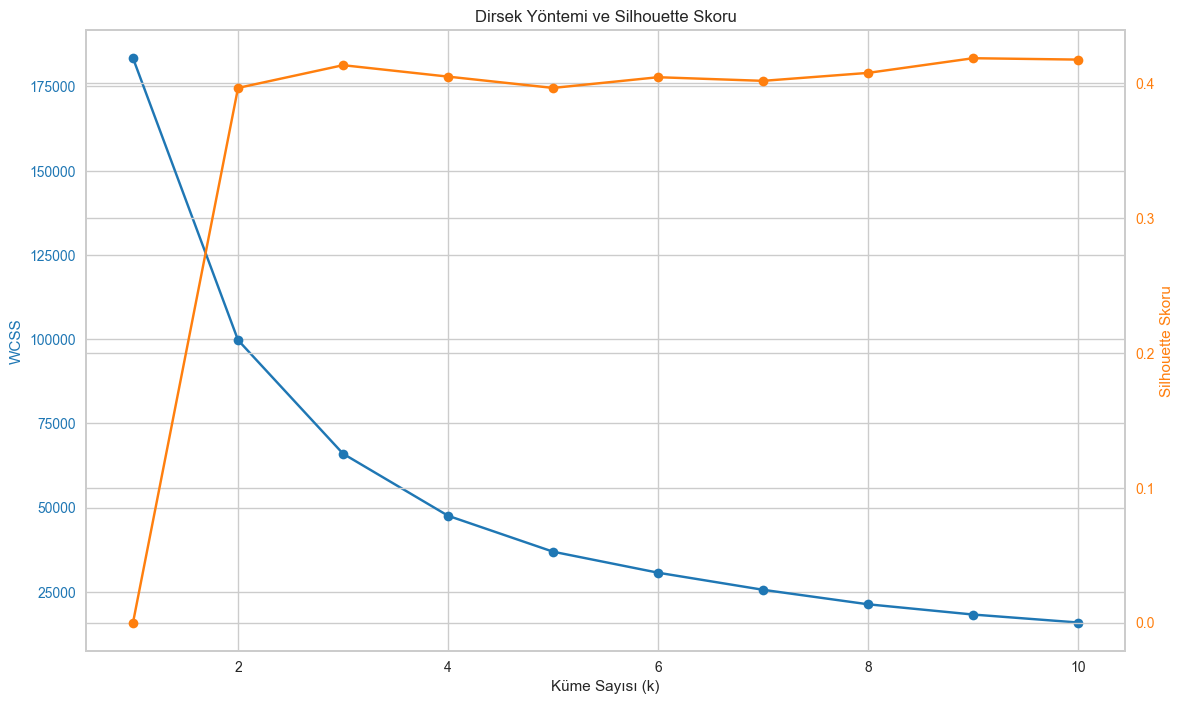

In [ ]:
k_values = range(1, 11) 
wcss = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_umap)
    wcss.append(kmeans.inertia_)
    if k > 1:  
        silhouette_scores.append(silhouette_score(df_umap, kmeans.labels_))
    else:
        silhouette_scores.append(0)  

fig, ax1 = plt.subplots(figsize=(12, 7))


ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('WCSS', color='tab:blue')
ax1.plot(k_values, wcss, 'o-', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('Silhouette Skoru', color='tab:orange')
ax2.plot(k_values, silhouette_scores, 'o-', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.tight_layout()
plt.title('Dirsek Yöntemi ve Silhouette Skoru')
plt.show()


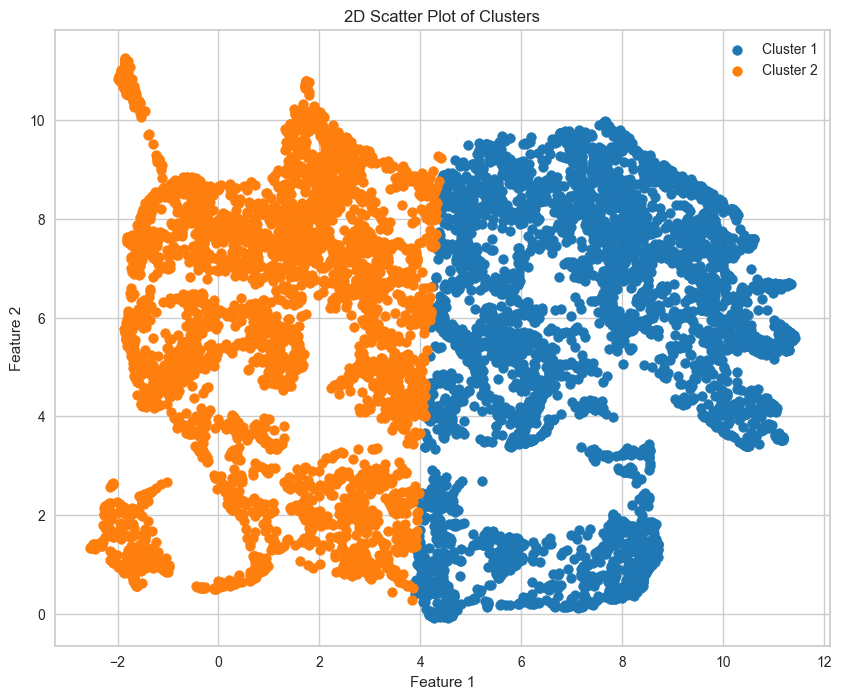

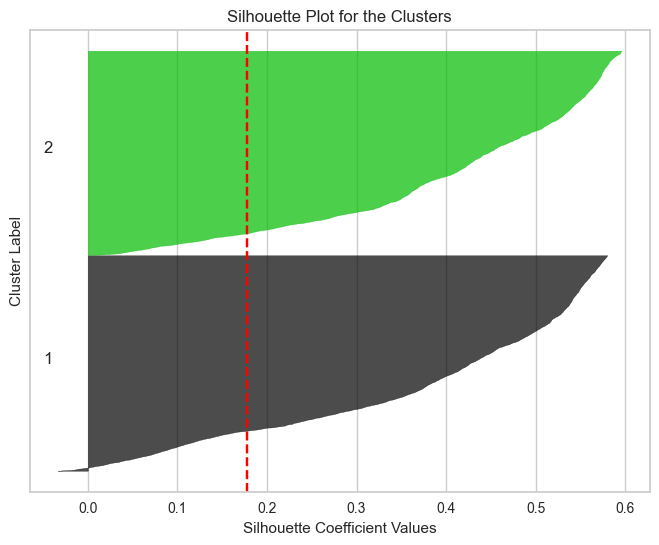

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df_umap)
labels = kmeans.labels_
umap_array = df_umap.values


fig = plt.figure(figsize=(10, 8))
colors = ['#1f77b4', '#ff7f0e']

for i, color in enumerate(colors):
    plt.scatter(umap_array[labels == i, 0], umap_array[labels == i, 1], 
                c=color, label=f'Cluster {i+1}', s=50)


plt.title("2D Scatter Plot of Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


silhouette_vals = silhouette_samples(df_umap, labels)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
y_lower = 10

for i in range(2):
    ith_cluster_silhouette_values = silhouette_vals[labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 2)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
    
    y_lower = y_upper + 10  

ax.set_title("Silhouette Plot for the Clusters")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")
ax.set_yticks([])  
ax.axvline(x=silhouette_score(df_scaled, labels), color="red", linestyle="--")  
plt.show()


In [ ]:
kmeans_umap = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
labels_umap = kmeans_umap.fit_predict(df_umap)

results["KMeans"]["umap"]["Silhouette Coefficient"] = silhouette_score(df_umap, labels_umap)
results["KMeans"]["umap"]["Calinski-Harabasz Index"] = calinski_harabasz_score(df_umap, labels_umap)
results["KMeans"]["umap"]["Davies-Bouldin Index"] = davies_bouldin_score(df_umap, labels_umap)

for metric, value in results["KMeans"]["umap"].items():
    print(f"{metric}: {value:.2f}")


Silhouette Coefficient: 0.40
Calinski-Harabasz Index: 7247.96
Davies-Bouldin Index: 1.01


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

print(df_pca.shape)

explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance (first two components): {100 * explained_variance.sum():.2f}%")


(8636, 2)
Explained Variance (first two components): 47.61%


In [ ]:
df_pca

array([[-1.6963917 , -1.12258733],
       [-1.21567821,  2.43563417],
       [ 0.9358427 , -0.38520771],
       ...,
       [-0.93002147, -1.84123799],
       [-2.35600355, -0.7187276 ],
       [-0.59682741, -0.44601139]])

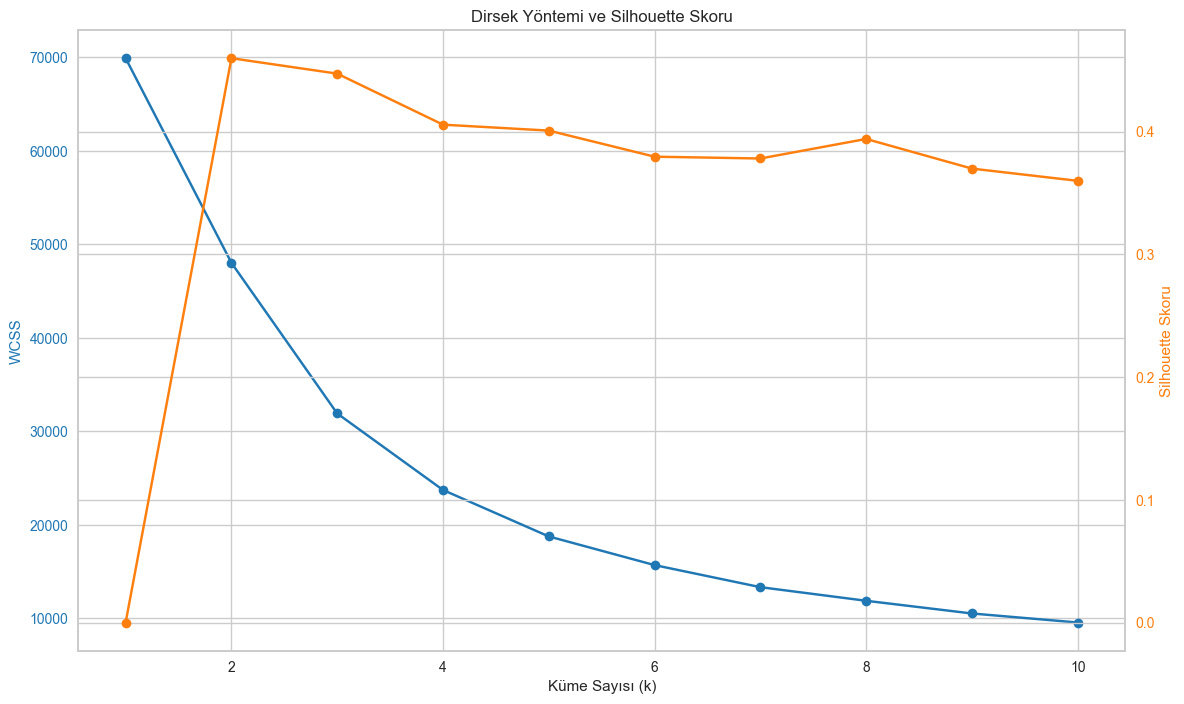

In [ ]:
k_values = range(1, 11)
wcss = [] 
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
    if k > 1:  
        silhouette_scores.append(silhouette_score(df_pca, kmeans.labels_))
    else:
        silhouette_scores.append(0)  

fig, ax1 = plt.subplots(figsize=(12, 7))


ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('WCSS', color='tab:blue')
ax1.plot(k_values, wcss, 'o-', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('Silhouette Skoru', color='tab:orange')
ax2.plot(k_values, silhouette_scores, 'o-', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.tight_layout()
plt.title('Dirsek Yöntemi ve Silhouette Skoru')
plt.show()


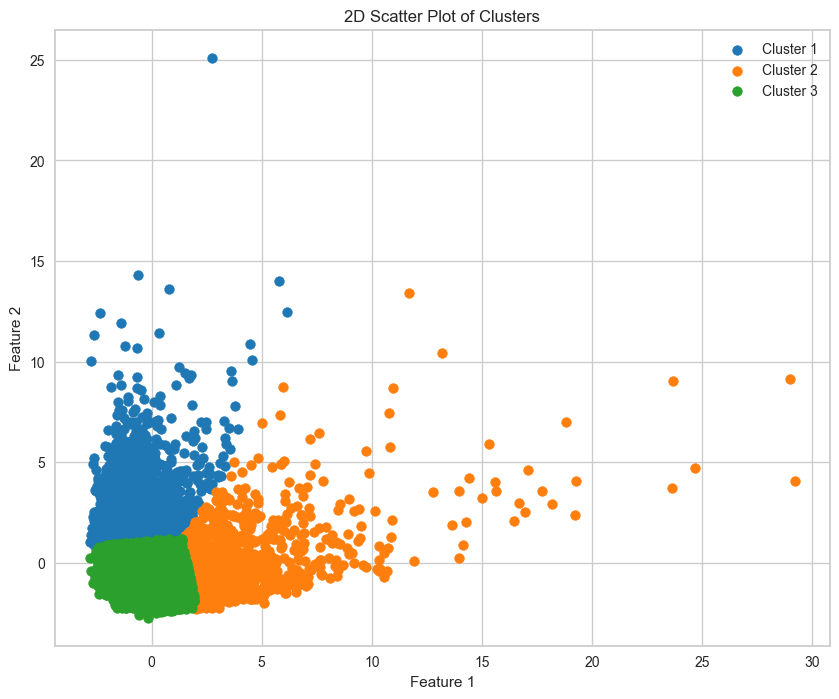

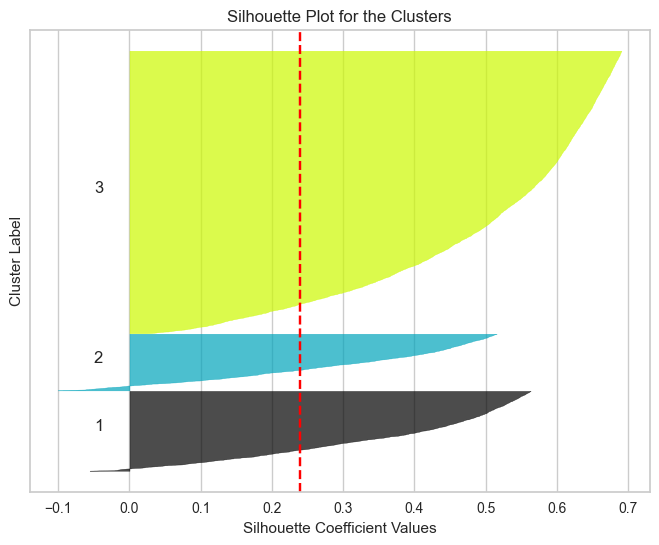

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df_pca)
kmeans_labels_pca = kmeans.labels_

fig = plt.figure(figsize=(10, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, color in enumerate(colors):
    plt.scatter(df_pca[kmeans_labels_pca == i, 0], df_pca[kmeans_labels_pca == i, 1], 
                c=color, label=f'Cluster {i+1}', s=50)

plt.title("2D Scatter Plot of Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

silhouette_vals = silhouette_samples(df_pca, kmeans_labels_pca)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
y_lower = 10

for i in range(3):
    ith_cluster_silhouette_values = silhouette_vals[kmeans_labels_pca == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 3)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
    
    y_lower = y_upper + 10  

ax.set_title("Silhouette Plot for the Clusters")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")
ax.set_yticks([])  
ax.axvline(x=silhouette_score(df_scaled, kmeans_labels_pca), color="red", linestyle="--")  
plt.show()


In [ ]:
kmeans_pca = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_labels_pca = kmeans_pca.fit_predict(df_pca)

results["KMeans"]["pca"]["Silhouette Coefficient"] = silhouette_score(df_pca, kmeans_labels_pca)
results["KMeans"]["pca"]["Calinski-Harabasz Index"] = calinski_harabasz_score(df_pca, kmeans_labels_pca)
results["KMeans"]["pca"]["Davies-Bouldin Index"] = davies_bouldin_score(df_pca, kmeans_labels_pca)

for metric, value in results["KMeans"]["pca"].items():
    print(f"{metric}: {value:.2f}")


Silhouette Coefficient: 0.45
Calinski-Harabasz Index: 5139.71
Davies-Bouldin Index: 0.82


In [ ]:
kmeans_labels_pca

array([2, 0, 2, ..., 2, 2, 2])

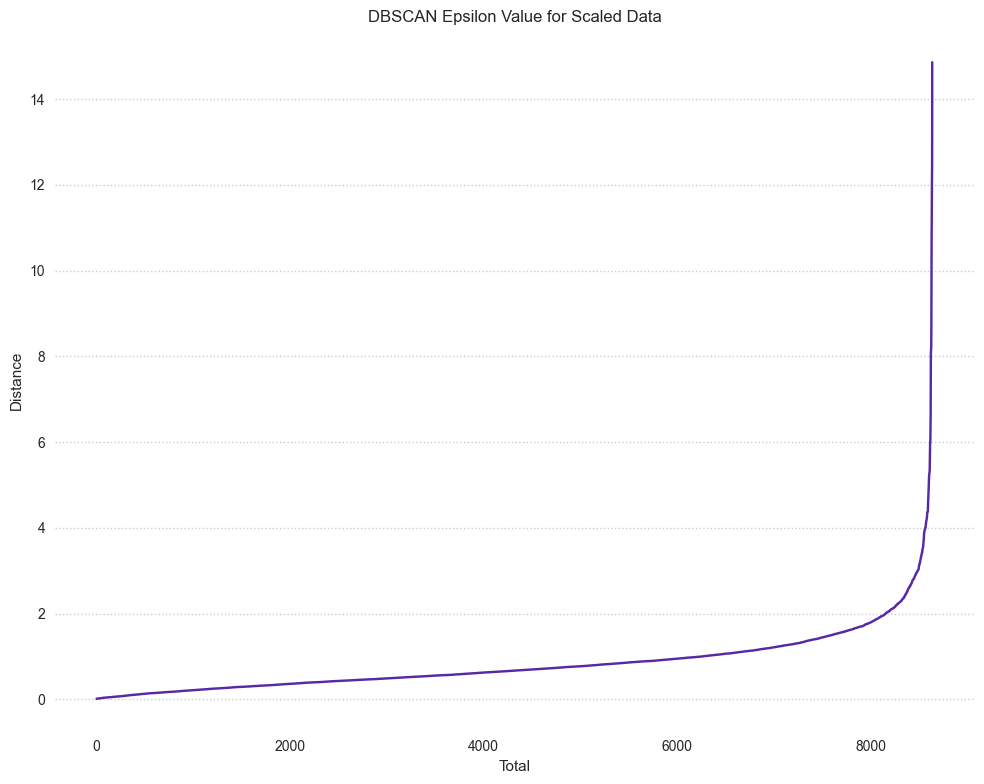

In [ ]:
X = df_scaled

def epsilon(X):
    
    neighbors = NearestNeighbors(n_neighbors=2)
    nbrs = neighbors.fit(X)
    distances, indices = nbrs.kneighbors(X)
    distances = np.sort(distances, axis=0)
    
    distances_1 = distances[:, 1]
    plt.plot(distances_1, color='#5829A7')
    plt.xlabel('Total')
    plt.ylabel('Distance')
        
    for spine in plt.gca().spines.values():
        spine.set_color('None')
        
    plt.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    plt.grid(axis='x', alpha=0)
    
    plt.title('DBSCAN Epsilon Value for Scaled Data')
    plt.tight_layout()
    plt.show();

epsilon(X);


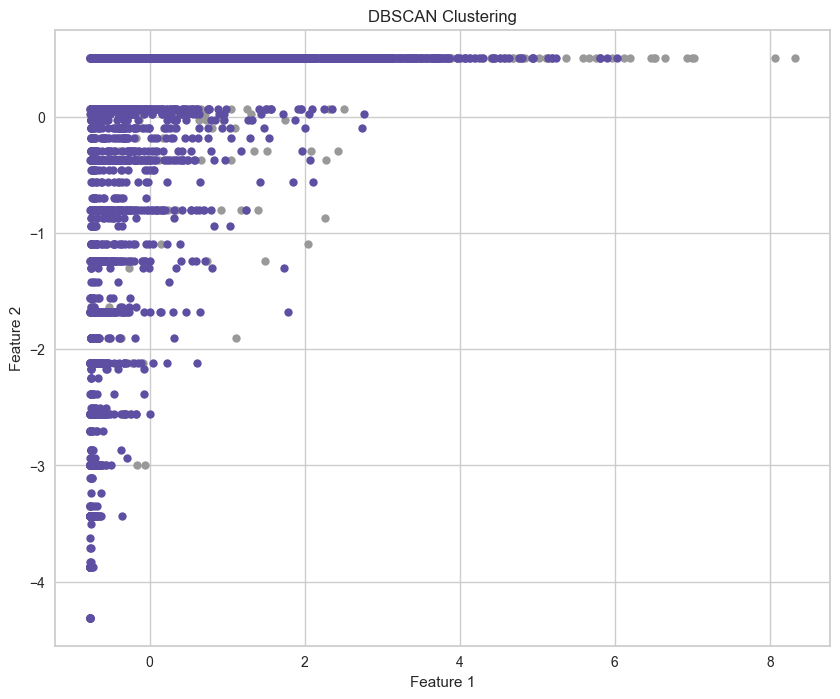

In [ ]:
dbscan = DBSCAN(eps=2.2, min_samples=5)
labels = dbscan.fit_predict(df_scaled)

plt.figure(figsize=(10, 8))
unique_labels = np.unique(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:  
        col = [0.6, 0.6, 0.6, 1]
    class_member_mask = (labels == k)
    xy = df_scaled[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')  
plt.ylabel('Feature 2')  
plt.grid(True)
plt.show()


In [ ]:
dbscan_normal = DBSCAN(eps=2.2, min_samples=5)
labels_normal = dbscan_normal.fit_predict(df_scaled)

results["DBSCAN"]["normal"]["Silhouette Coefficient"] = silhouette_score(df_scaled, labels_normal) if len(np.unique(labels_normal)) > 1 else 0
results["DBSCAN"]["normal"]["Calinski-Harabasz Index"] = calinski_harabasz_score(df_scaled, labels_normal)
results["DBSCAN"]["normal"]["Davies-Bouldin Index"] = davies_bouldin_score(df_scaled, labels_normal)

for metric, value in results["DBSCAN"]["normal"].items():
    print(f"{metric}: {value:.2f}")


Silhouette Coefficient: 0.52
Calinski-Harabasz Index: 904.04
Davies-Bouldin Index: 1.99


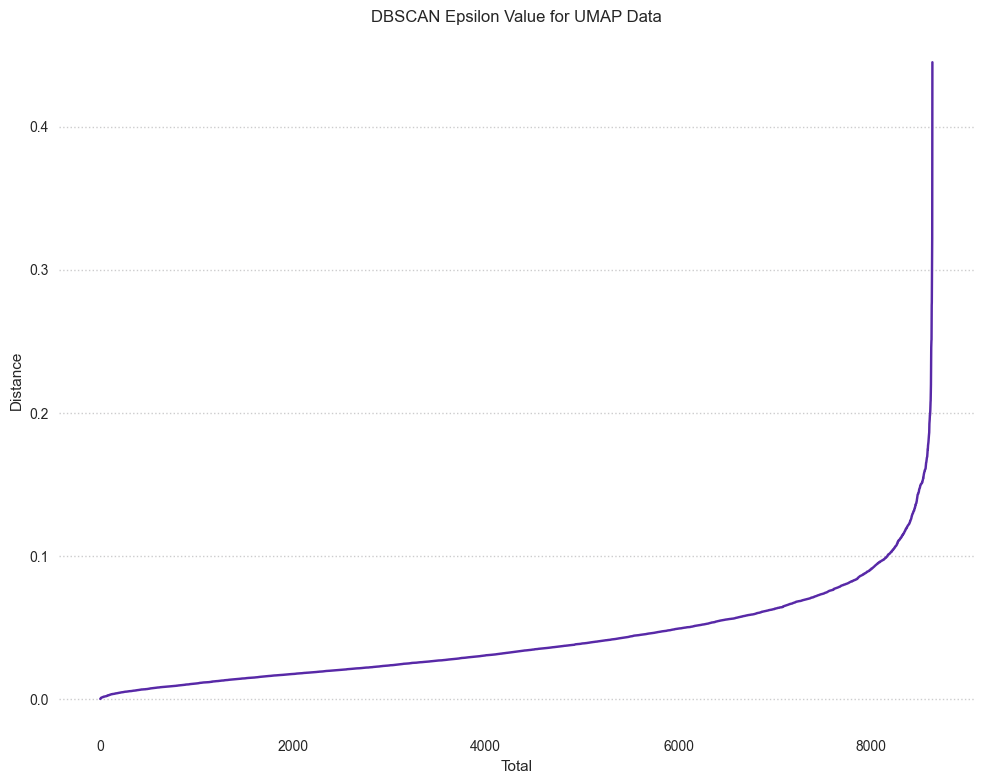

In [ ]:
X = df_umap


def epsilon(X):
    
    
    neighbors = NearestNeighbors(n_neighbors=2)
    nbrs = neighbors.fit(X)
    distances, indices = nbrs.kneighbors(X)
    distances = np.sort(distances, axis=0)
    
    
    distances_1 = distances[:, 1]
    plt.plot(distances_1, color='#5829A7')
    plt.xlabel('Total')
    plt.ylabel('Distance')
        
    for spine in plt.gca().spines.values():
        spine.set_color('None')
        
    plt.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    plt.grid(axis='x', alpha=0)
    
    plt.title('DBSCAN Epsilon Value for UMAP Data')
    plt.tight_layout()
    plt.show();

epsilon(X);


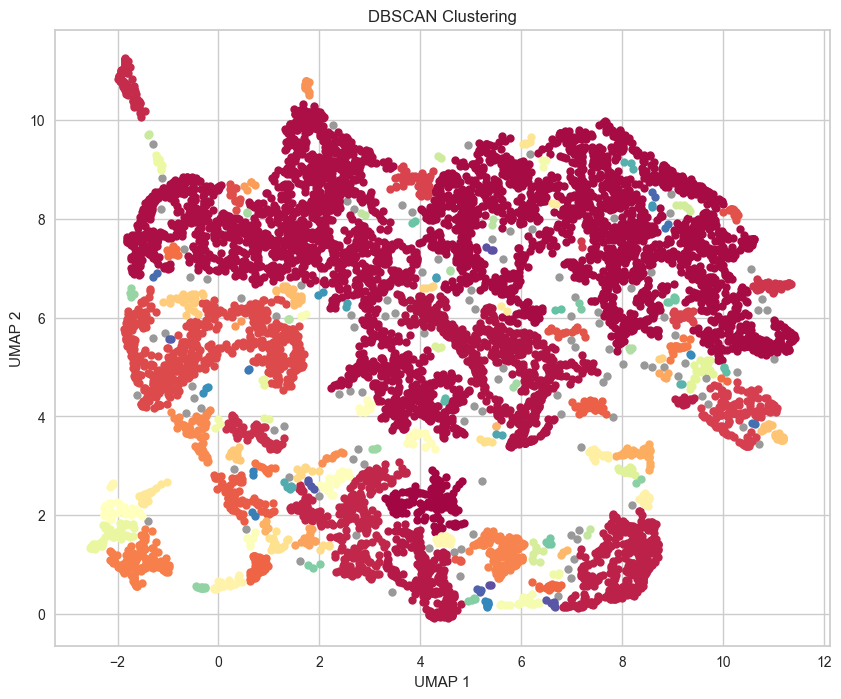

In [ ]:
dbscan = DBSCAN(eps=0.15, min_samples=2)
labels = dbscan.fit_predict(df_umap.values)  

plt.figure(figsize=(10, 8))
unique_labels = np.unique(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1: 
        col = [0.6, 0.6, 0.6, 1]
    class_member_mask = (labels == k)
    xy = df_umap.values[class_member_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()


In [ ]:
dbscan_umap = DBSCAN(eps=2.23, min_samples=2)
labels_umap = dbscan_umap.fit_predict(df_umap)

results["DBSCAN"]["umap"]["Silhouette Coefficient"] = silhouette_score(df_umap, labels_umap) if len(np.unique(labels_umap)) > 1 else 0
results["DBSCAN"]["umap"]["Calinski-Harabasz Index"] = calinski_harabasz_score(df_umap, labels_umap)
results["DBSCAN"]["umap"]["Davies-Bouldin Index"] = davies_bouldin_score(df_umap, labels_umap)

for metric, value in results["DBSCAN"]["umap"].items():
    print(f"{metric}: {value:.2f}")


Silhouette Coefficient: 0.31
Calinski-Harabasz Index: 306.81
Davies-Bouldin Index: 0.55


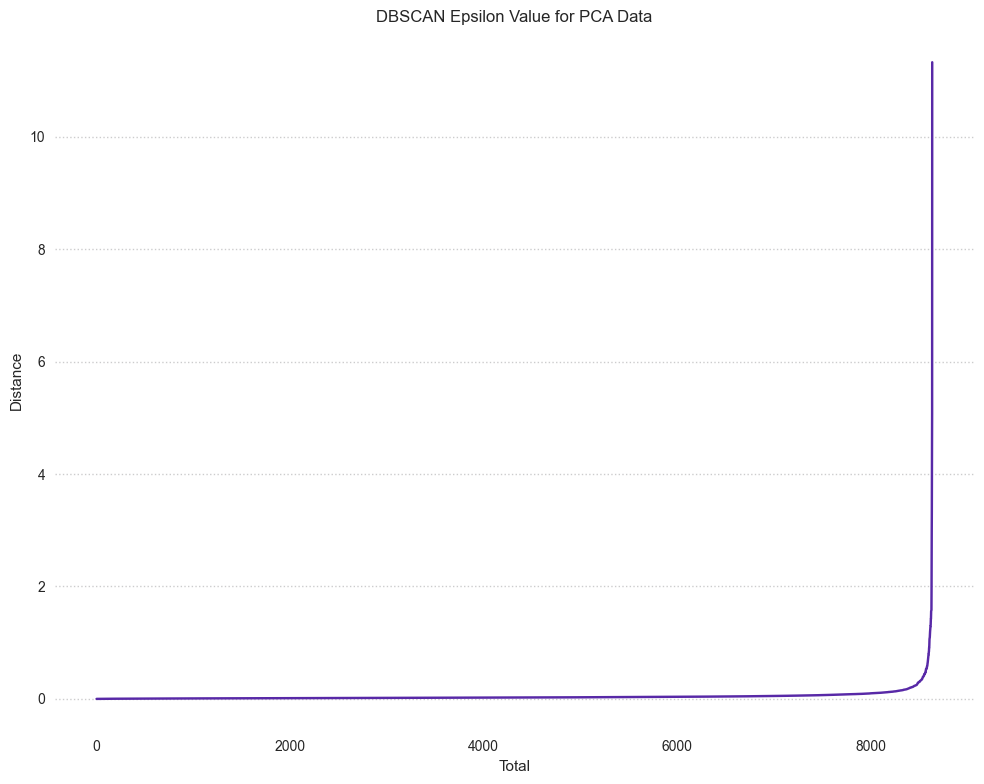

In [ ]:
X = df_pca

def epsilon(X):
    
    neighbors = NearestNeighbors(n_neighbors=2)
    nbrs = neighbors.fit(X)
    distances, indices = nbrs.kneighbors(X)
    distances = np.sort(distances, axis=0)

    distances_1 = distances[:, 1]
    plt.plot(distances_1, color='#5829A7')
    plt.xlabel('Total')
    plt.ylabel('Distance')
        
    for spine in plt.gca().spines.values():
        spine.set_color('None')
        
    plt.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    plt.grid(axis='x', alpha=0)
    
    plt.title('DBSCAN Epsilon Value for PCA Data')
    plt.tight_layout()
    plt.show();

epsilon(X);


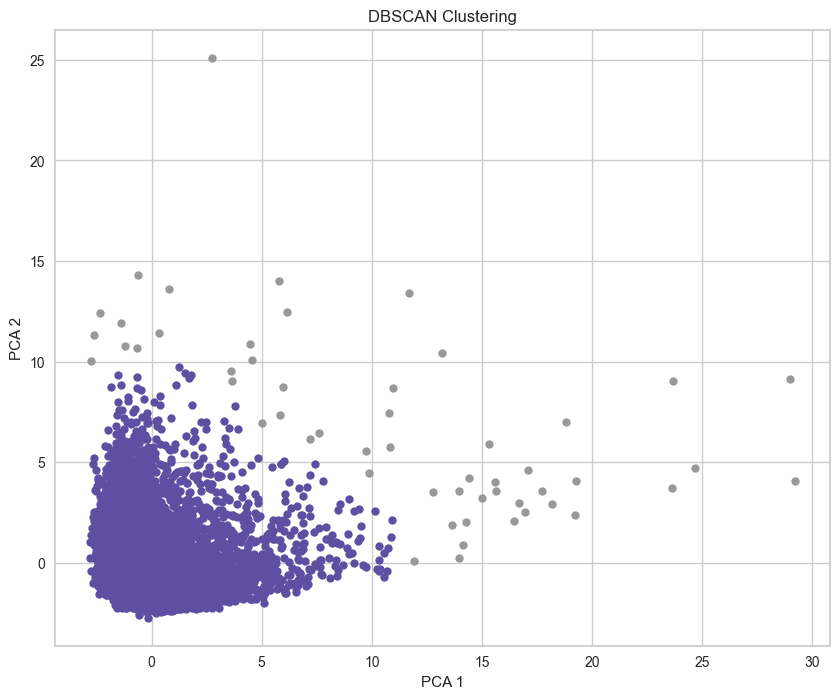

In [ ]:
dbscan = DBSCAN(eps=1, min_samples=5)
labels = dbscan.fit_predict(df_pca)  

plt.figure(figsize=(10, 8))
unique_labels = np.unique(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:  
        col = [0.6, 0.6, 0.6, 1]
    class_member_mask = (labels == k)
    xy = df_pca[class_member_mask]  
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


In [ ]:
dbscan_pca = DBSCAN(eps=1, min_samples=5)
labels_pca = dbscan_pca.fit_predict(df_pca)

results["DBSCAN"]["pca"]["Silhouette Coefficient"] = silhouette_score(df_pca, labels_pca) if len(np.unique(labels_pca)) > 1 else 0
results["DBSCAN"]["pca"]["Calinski-Harabasz Index"] = calinski_harabasz_score(df_pca, labels_pca)
results["DBSCAN"]["pca"]["Davies-Bouldin Index"] = davies_bouldin_score(df_pca, labels_pca)

for metric, value in results["DBSCAN"]["pca"].items():
    print(f"{metric}: {value:.2f}")


Silhouette Coefficient: 0.79
Calinski-Harabasz Index: 1318.21
Davies-Bouldin Index: 0.79


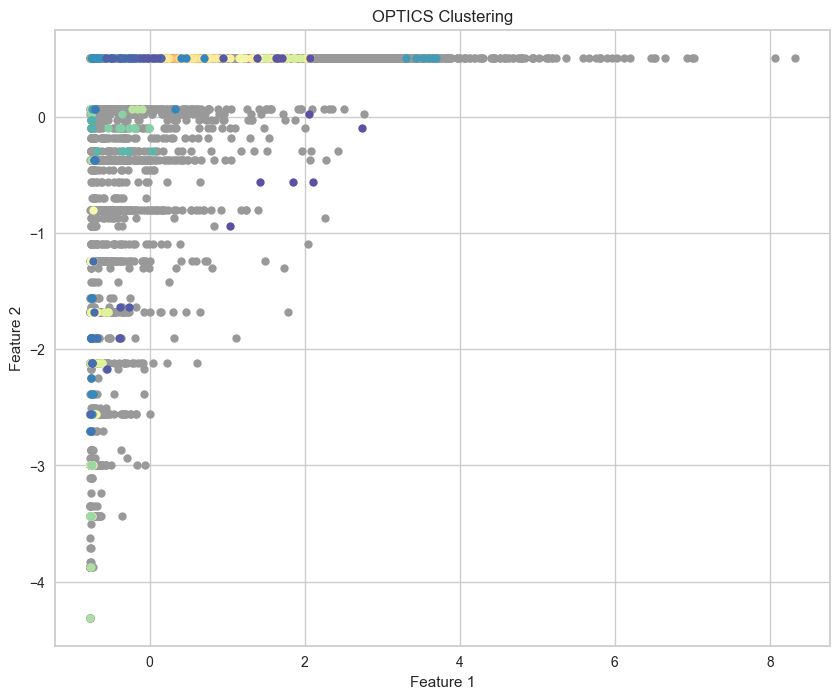

In [ ]:
optics = OPTICS(min_samples=5, max_eps=2.2)
labels = optics.fit_predict(df_scaled)

plt.figure(figsize=(10, 8))
unique_labels = np.unique(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:  
        col = [0.6, 0.6, 0.6, 1]
    class_member_mask = (labels == k)
    xy = df_scaled[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)  

plt.title('OPTICS Clustering')
plt.xlabel('Feature 1')  
plt.ylabel('Feature 2')  
plt.grid(True)
plt.show()


In [ ]:
optics_normal = OPTICS(min_samples=5)
labels_normal = optics_normal.fit_predict(df_scaled)

results["OPTICS"]["normal"]["Silhouette Coefficient"] = silhouette_score(df_scaled, labels_normal) if len(np.unique(labels_normal)) > 1 else 0
results["OPTICS"]["normal"]["Calinski-Harabasz Index"] = calinski_harabasz_score(df_scaled, labels_normal)
results["OPTICS"]["normal"]["Davies-Bouldin Index"] = davies_bouldin_score(df_scaled, labels_normal)

for metric, value in results["OPTICS"]["normal"].items():
    print(f"{metric}: {value:.2f}")


Silhouette Coefficient: -0.53
Calinski-Harabasz Index: 6.76
Davies-Bouldin Index: 1.30


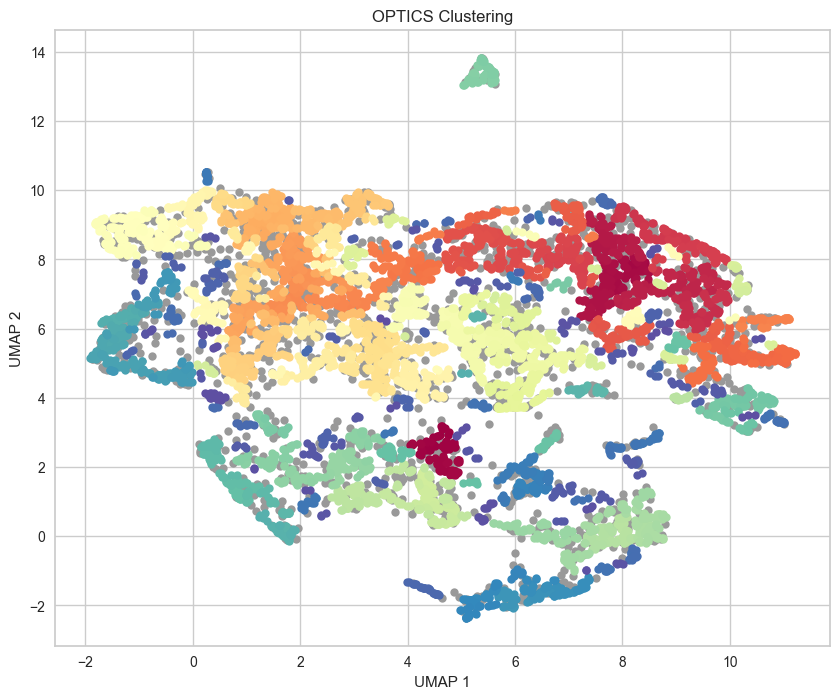

In [ ]:
optics = OPTICS(min_samples=2, max_eps=0.15)
labels = optics.fit_predict(df_umap.values)  

plt.figure(figsize=(10, 8))
unique_labels = np.unique(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:  
        col = [0.6, 0.6, 0.6, 1]
    class_member_mask = (labels == k)
    xy = df_umap.values[class_member_mask]  
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('OPTICS Clustering')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()


In [ ]:
optics_umap = OPTICS(min_samples=2)
labels_umap = optics_umap.fit_predict(df_umap)

results["OPTICS"]["umap"]["Silhouette Coefficient"] = silhouette_score(df_umap, labels_umap) if len(np.unique(labels_umap)) > 1 else 0
results["OPTICS"]["umap"]["Calinski-Harabasz Index"] = calinski_harabasz_score(df_umap, labels_umap)
results["OPTICS"]["umap"]["Davies-Bouldin Index"] = davies_bouldin_score(df_umap, labels_umap)

for metric, value in results["OPTICS"]["umap"].items():
    print(f"{metric}: {value:.2f}")


Silhouette Coefficient: 0.24
Calinski-Harabasz Index: 10.74
Davies-Bouldin Index: 1.39


In [ ]:
optics_umap = OPTICS(min_samples=2)
labels_umap = optics_umap.fit_predict(df_umap)

results["OPTICS"]["umap"]["Silhouette Coefficient"] = silhouette_score(df_umap, labels_umap) if len(np.unique(labels_umap)) > 1 else 0
results["OPTICS"]["umap"]["Calinski-Harabasz Index"] = calinski_harabasz_score(df_umap, labels_umap)
results["OPTICS"]["umap"]["Davies-Bouldin Index"] = davies_bouldin_score(df_umap, labels_umap)

for metric, value in results["OPTICS"]["umap"].items():
    print(f"{metric}: {value:.2f}")


Silhouette Coefficient: 0.24
Calinski-Harabasz Index: 10.74
Davies-Bouldin Index: 1.39


In [ ]:
optics_pca = OPTICS(min_samples=5)
labels_pca = optics_pca.fit_predict(df_pca)

results["OPTICS"]["pca"]["Silhouette Coefficient"] = silhouette_score(df_pca, labels_pca) if len(np.unique(labels_pca)) > 1 else 0
results["OPTICS"]["pca"]["Calinski-Harabasz Index"] = calinski_harabasz_score(df_pca, labels_pca)
results["OPTICS"]["pca"]["Davies-Bouldin Index"] = davies_bouldin_score(df_pca, labels_pca)

for metric, value in results["OPTICS"]["pca"].items():
    print(f"{metric}: {value:.2f}")


Silhouette Coefficient: -0.19
Calinski-Harabasz Index: 11.29
Davies-Bouldin Index: 1.56


In [ ]:
from IPython.display import display, Markdown

def display_results(results):
    for method, data in results.items():
        display(Markdown(f"### {method}"))
        for dataset, metrics in data.items():
            display(Markdown(f"#### {dataset}"))
            for metric, value in metrics.items():
                display(Markdown(f"- **{metric}**: {value:.2f}"))

display_results(results)


### KMeans

#### normal

- **Silhouette Coefficient**: 0.25

- **Calinski-Harabasz Index**: 1546.53

- **Davies-Bouldin Index**: 1.60

#### umap

#### pca

#### outlier_free

- **Silhouette Coefficient**: 0.33

- **Calinski-Harabasz Index**: 4302.10

- **Davies-Bouldin Index**: 1.41

### DBSCAN

#### normal

#### umap

- **Silhouette Coefficient**: 0.31

- **Calinski-Harabasz Index**: 306.81

- **Davies-Bouldin Index**: 0.55

#### pca

- **Silhouette Coefficient**: 0.79

- **Calinski-Harabasz Index**: 1318.21

- **Davies-Bouldin Index**: 0.79

### OPTICS

#### normal

- **Silhouette Coefficient**: -0.53

- **Calinski-Harabasz Index**: 6.76

- **Davies-Bouldin Index**: 1.30

#### umap

- **Silhouette Coefficient**: 0.24

- **Calinski-Harabasz Index**: 10.74

- **Davies-Bouldin Index**: 1.39

#### pca

- **Silhouette Coefficient**: -0.19

- **Calinski-Harabasz Index**: 11.29

- **Davies-Bouldin Index**: 1.56

In [ ]:
import joblib

joblib.dump(kmeans_pca, 'kmeans_pca_model.pkl')


NameError: name 'kmeans' is not defined

In [ ]:
import joblib

joblib.dump(kmeans, 'kmeans_model.pkl')
